# DSC 680 Project Two

Logan Quandt

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
#read in dataset and ensure it loaded correctly
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [197]:
#drop unnecessary ID column
stroke_df = stroke_df.drop('id', axis=1)

In [198]:
#view shape
stroke_df.shape

(5110, 11)

In [199]:
#view dtypes
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [200]:
#use labelencoder to switch obkect columns to dummy variables
stroke_df = pd.get_dummies(stroke_df)

In [201]:
#check that dtypes converted and view df
print(stroke_df.dtypes)
stroke_df.head()

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [202]:
#check for missing values
stroke_df.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

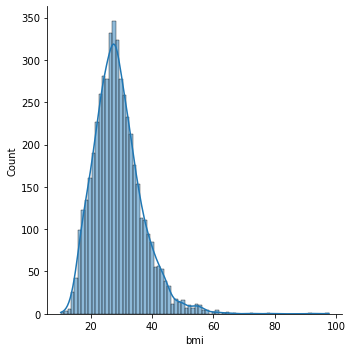

In [203]:
#view distribution of bmi before filling
sns.displot(data = stroke_df, x = 'bmi', kde=True)

In [204]:
#fill BMI with mean
stroke_df.fillna(stroke_df['bmi'].mean(), inplace=True)
stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [205]:
#ensure null values were corrected
stroke_df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [206]:
#check for duplicates
stroke_df.duplicated().sum()

0

In [207]:
#look at summary stats
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.585910,0.413894,0.000196,0.343836,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.492612,0.492578,0.013989,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


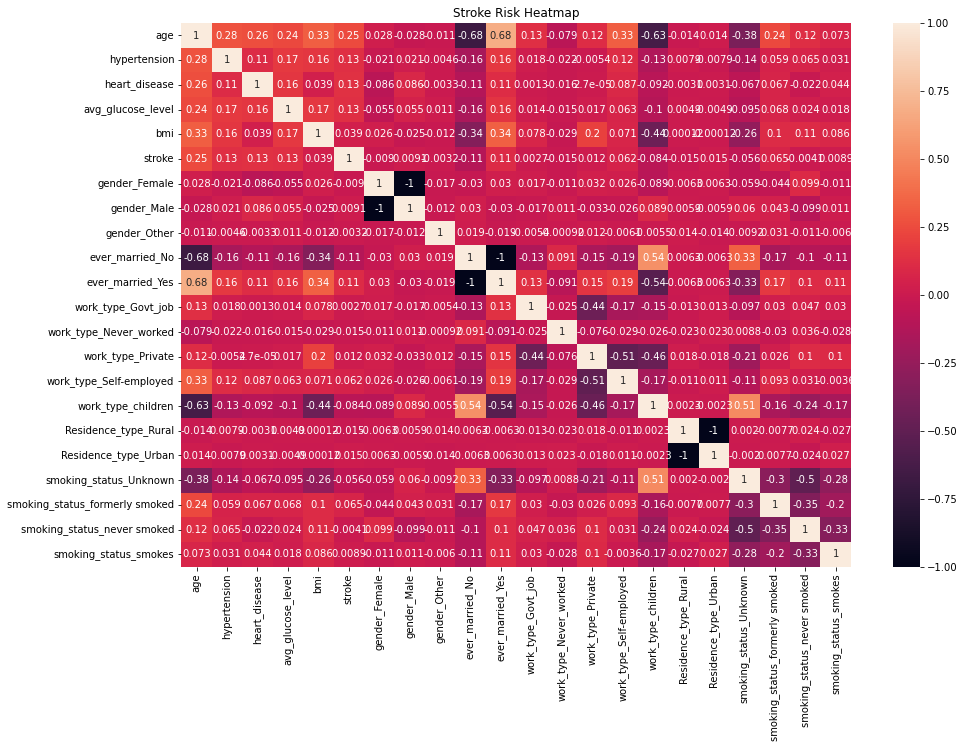

In [208]:
#view heatmap of correlation
plt.figure(figsize = (15,10))
sns.heatmap(stroke_df.corr(), annot=True)
plt.title('Stroke Risk Heatmap')
plt.show()

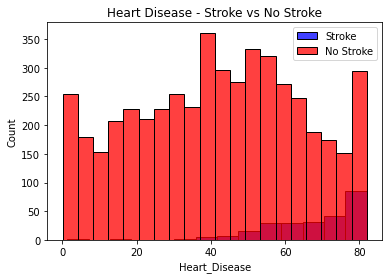

In [209]:
#view stroke vs non-stroke by age
fig = plt.figure
sns.histplot(data = stroke_df[stroke_df['stroke'] == 1], x='age', label='Stroke', color='blue')
sns.histplot(data = stroke_df[stroke_df['stroke'] == 0], x='age', label='No Stroke', color = 'red')
plt.title("Heart Disease - Stroke vs No Stroke")
plt.xlabel('Heart_Disease')
plt.ylabel('Count')
plt.legend()
plt.show()

In [210]:
#view average age of groups
stroke_df.groupby('stroke')['age'].mean()

stroke
0    41.971545
1    67.728193
Name: age, dtype: float64

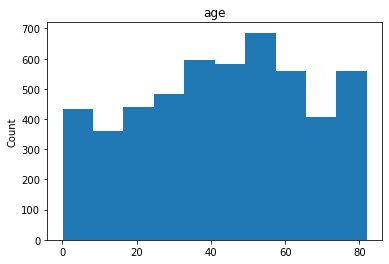

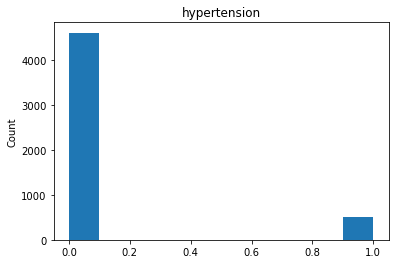

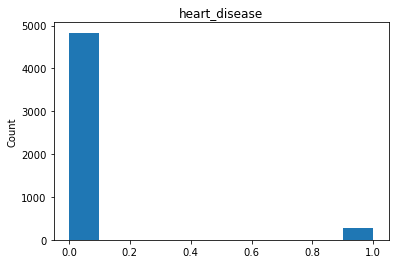

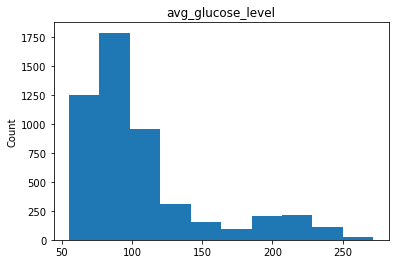

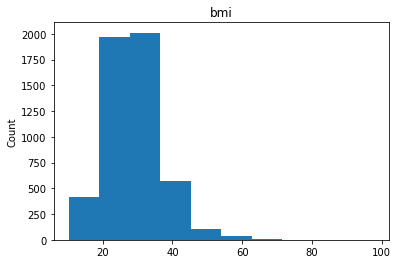

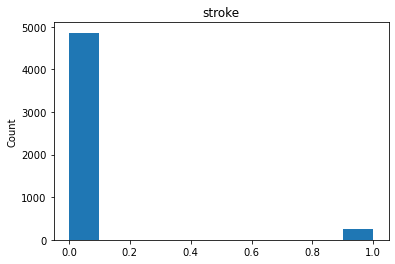

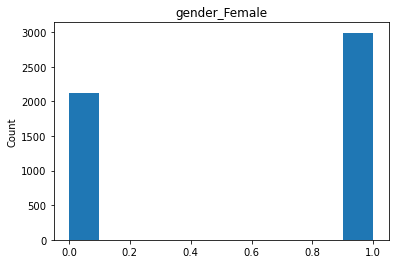

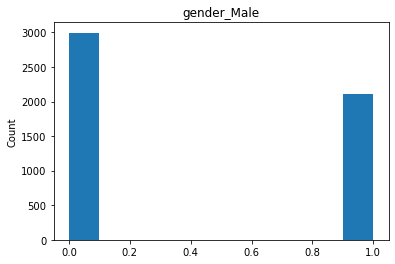

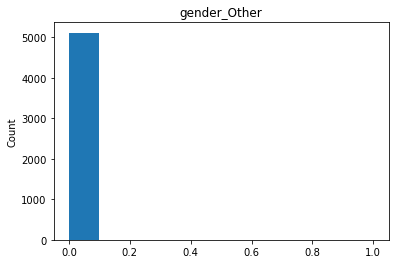

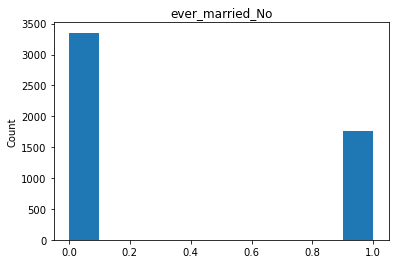

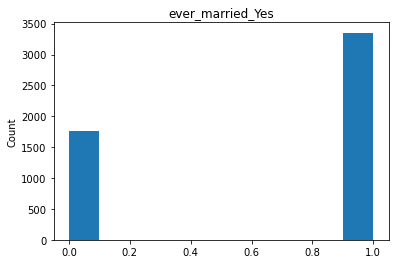

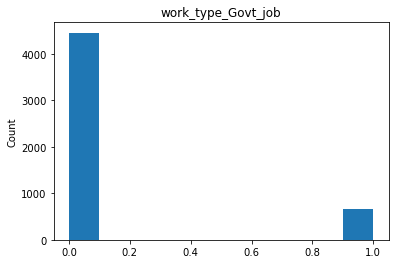

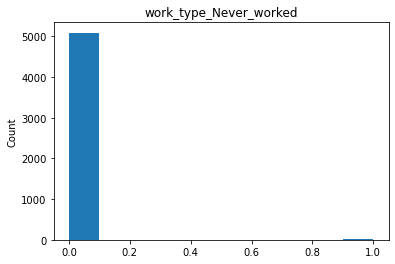

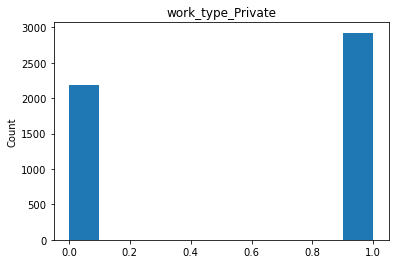

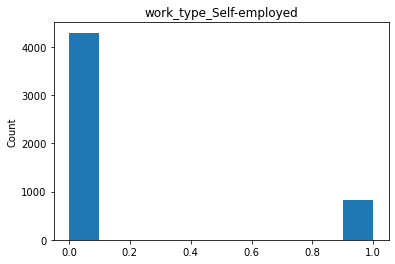

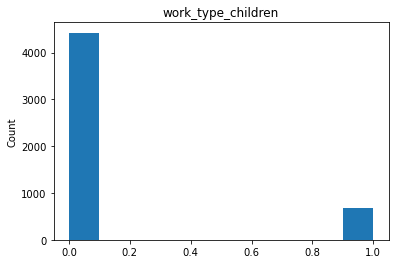

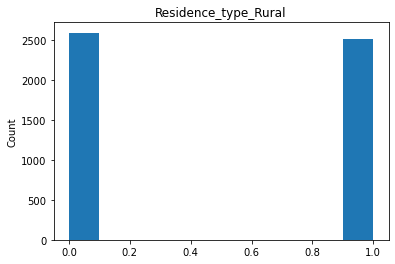

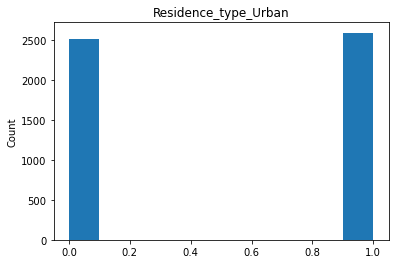

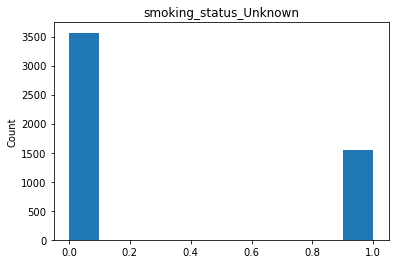

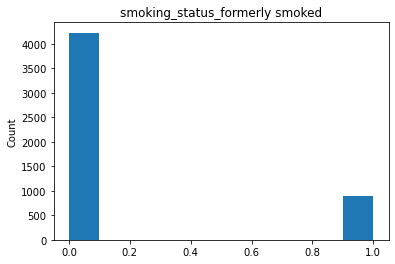

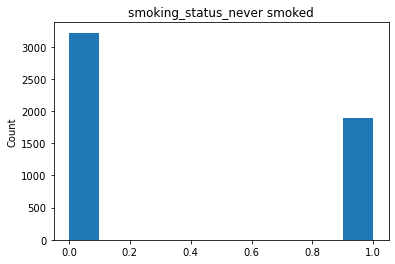

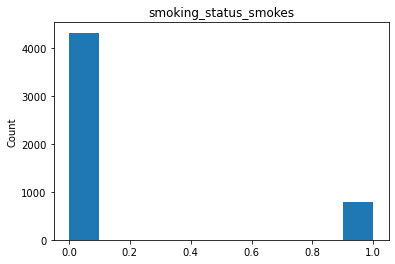

In [211]:
#look through variables for histograms
for var in stroke_df.columns:
    plt.hist(stroke_df[var])
    plt.title(var)
    plt.ylabel('Count')
    plt.show()

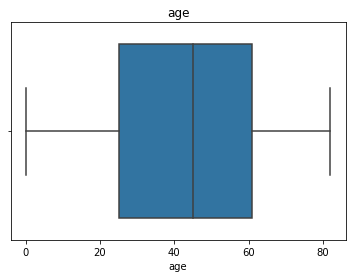

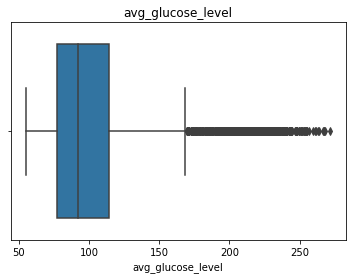

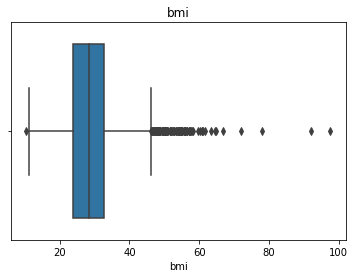

In [212]:
#loop through variables for box plots
box_list = ['age', 'avg_glucose_level', 'bmi']
for i in range(3):
    plt.title(box_list[i])
    sns.boxplot(x=stroke_df[box_list[i]])
    plt.show()

In [213]:
#import libraries for modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [214]:
#create training and test set using 80/20 split
x = stroke_df.drop(['stroke'], axis=1)
y = stroke_df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [215]:
#create standardizer
standardizer = MinMaxScaler()

In [216]:
#view imbalanced count
from collections import Counter
Counter(y_train)

Counter({0: 3895, 1: 193})

In [217]:
#solve imbalance using SMOTE
from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state = 43)
x_train_sm, y_train_sm = SM.fit_resample(x_train, y_train)

In [218]:
#verify SMOTE was successful
Counter(y_train_sm)

Counter({0: 3895, 1: 3895})

In [219]:
#create KNN model
knn = KNeighborsClassifier()

In [220]:
#setup pipeline for KNN
pipe = Pipeline([('scaler', standardizer), ('knn', knn)])

In [221]:
#create searchspace
search_space = [{'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,13,24,25]}]

In [222]:
#fit KNN
KNclassifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_train_sm, y_train_sm)

In [223]:
#view best parameters
KNclassifier.best_estimator_.get_params()['knn__n_neighbors']

2

In [224]:
#import and view metrics for KNN
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
KNclassifier_pred = KNclassifier.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, KNclassifier_pred))
print("F1 Score:" ,f1_score(y_test, KNclassifier_pred))
print("Precision Score:", precision_score(y_test, KNclassifier_pred))
print('Recall Score:', recall_score(y_test, KNclassifier_pred))

Accuracy Score: 0.9373776908023483
F1 Score: 0.058823529411764705
Precision Score: 0.16666666666666666
Recall Score: 0.03571428571428571


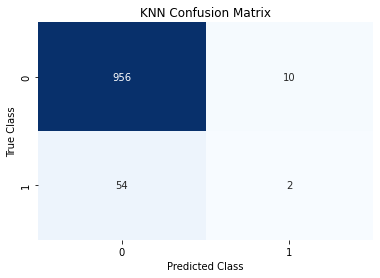

In [225]:
#setup confusion matrix for KNN
confusion_matrix_one = confusion_matrix(y_test, KNclassifier_pred)
KNconfusion_df = pd.DataFrame(confusion_matrix_one)
sns.heatmap(KNconfusion_df, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

In [226]:
#create pipeline and searchspace for 3 models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import liblinear

pipe2 = Pipeline([('scaler', standardizer), ('classifier', RandomForestClassifier())])

search_space2 = [{'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                 {'classifier': [LogisticRegression(max_iter=1000, solver='saga')], "classifier__penalty": ['l2'], 'classifier__C': np.logspace(0,4,10)},
                {'classifier': [RandomForestClassifier()], 'classifier__n_estimators': [10,100,1000], 'classifier__max_features': [1,2,3]}]

In [227]:
#fit using GridSearchCV to find best model and parameters
classifier2 = GridSearchCV(pipe2, search_space2, cv=5, verbose=0).fit(x_train_sm, y_train_sm)

C:\Users\logan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\logan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\logan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\logan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\logan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\logan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [228]:
#view best parameters
classifier2.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('classifier', RandomForestClassifier(max_features=3, n_estimators=1000))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': RandomForestClassifier(max_features=3, n_estimators=1000),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 3,
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 1000,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [229]:
#view metrics for RFC
classifer2_pred = classifier2.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, classifer2_pred))
print("F1 Score:" ,f1_score(y_test, classifer2_pred))
print("Precision Score:", precision_score(y_test, classifer2_pred))
print('Recall Score:', recall_score(y_test, classifer2_pred))

Accuracy Score: 0.9383561643835616
F1 Score: 0.03076923076923077
Precision Score: 0.1111111111111111
Recall Score: 0.017857142857142856


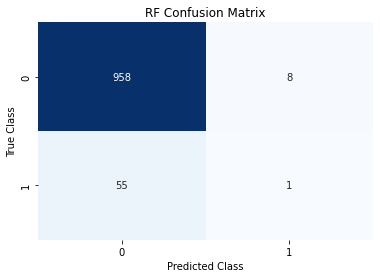

In [230]:
#create confusion matrix for RFC
confusion_matrix_two = confusion_matrix(y_test, classifer2_pred)
confusion_df = pd.DataFrame(confusion_matrix_two)
sns.heatmap(confusion_df, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('RF Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

In [231]:
#test out XGBClassifier to see if it has superior performance
from xgboost import XGBClassifier

pipeline3 = Pipeline([('scaler', standardizer), ('classifier', XGBClassifier())])
search_space3 = [{'classifier': [XGBClassifier()]}]

In [232]:
#fit XGB using GridSearchCV
classifier_3 = GridSearchCV(pipeline3, search_space3, cv=5, verbose=0).fit(x_train_sm, y_train_sm)

In [233]:
#view parameters for XGB
classifier_3.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('classifier',
   XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                 max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                 missing=nan, monotone_constraints='()', n_estimators=100,
                 n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
                 reg_alpha=0, reg_lambda=1, ...))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytr

In [234]:
#metrics for XGB
classifer3_pred = classifier_3.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, classifer3_pred))
print("F1 Score:" ,f1_score(y_test, classifer3_pred))
print("Precision Score:", precision_score(y_test, classifer3_pred))
print('Recall Score:', recall_score(y_test, classifer3_pred))

Accuracy Score: 0.9295499021526419
F1 Score: 0.05263157894736841
Precision Score: 0.1
Recall Score: 0.03571428571428571


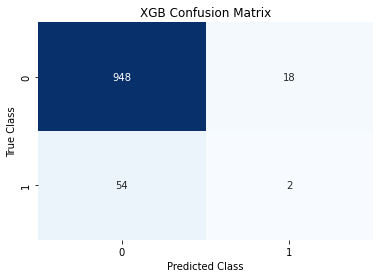

In [236]:
#confusion matrix for XGB
confusion_matrix_three = confusion_matrix(y_test, classifer3_pred)
confusion_df = pd.DataFrame(confusion_matrix_three)
sns.heatmap(confusion_df, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('XGB Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()